# AI-based Surveying the Impact of Environmental, Climatic, Economic and Demographic Conditions on the Epidemic Outbreak Rate of COVID-19

$Mehryar{\,}Majd$, $Ramin{\,}Mousa$ \& $Arsalan{\,}Mousazadeh$

__Abstract:__ This study aims to have an analytical and predictive approach to the growth rate and spread of the first wave of COVID-19 infection and mainly focuses on its dependency on other global factors in affected countries via Artificial Intelligence-based processing of fatality data/statistics. Fatality, infected, and recovered cases in the form of the time-series data was acquired through the World Health Organization (WHO) & the Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE). Recorded health data subsequently was analyzed by several Deep Neural Network (DNN) models to create a better intuition of epidemic outbreak rate of COVID-19. Monitoring spreading trend changes becomes more feasible via continuous observation of statistical pattern and integrating the other datasets with more global features count as factors influencing the local conditions on historical data conveys pivotal information concerning learning the pattern of epidemic progression. In this study, attention-based Sequence-to-Sequence (Seq2Seq) models empowered by Long-Short Term Memory (LSTM) and Gated Recurrent Unit (GRU) units, were deployed to predict mortality rate. Ultimately these analyses are utilized to monitor infection behaviour on time-series data and were subsequently assessed for their performance to predict the behaviour of the first wave of COVID-19 outbreak rate intensely. Demographic & environmental conditions have likely been influenced significantly to shape the reliable predictive learning algorithms for long-duration risk of COVID-19 pandemic.

### Using baseline ML methods on COVID-19 data to analyse and visualize __Confirmed, Deaths & Recovered__ cases
__Data Cleaning & Preprocessing__

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
from datetime import timedelta
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,r2_score
import statsmodels.api as sm
from statsmodels.tsa.api import Holt,SimpleExpSmoothing,ExponentialSmoothing
from sklearn.preprocessing import PolynomialFeatures

In [2]:
covid=pd.read_csv("novel-corona-virus/covid_19_data.csv")
covid.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1,0,0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14,0,0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6,0,0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1,0,0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0,0,0


In [3]:
print("Size/Shape of the dataset: ",covid.shape)
print("Checking for null values:\n",covid.isnull().sum())
print("Checking Data-type of each column:\n",covid.dtypes)

Size/Shape of the dataset:  (4935, 8)
Checking for null values:
 SNo                   0
ObservationDate       0
Province/State     1815
Country/Region        0
Last Update           0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64
Checking Data-type of each column:
 SNo                 int64
ObservationDate    object
Province/State     object
Country/Region     object
Last Update        object
Confirmed           int64
Deaths              int64
Recovered           int64
dtype: object


In [4]:
covid.drop(["SNo","Province/State"],1,inplace=True)


In [5]:
#Converting "Observation Date" into Datetime format
covid["ObservationDate"]=pd.to_datetime(covid["ObservationDate"])

In [6]:
#Grouping different types of cases as per the date
datewise=covid.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
datewise.head()


,Confirmed,Recovered,Deaths
ObservationDate,,,
2020-01-22,555,28,17
2020-01-23,653,30,18
2020-01-24,941,36,26
2020-01-25,1438,39,42
2020-01-26,2118,52,56


In [7]:
print("Basic Information")
print("Totol number of countries with Disease Spread: ",len(covid["Country/Region"].unique()))
print("Total number of Confirmed Cases",datewise["Confirmed"].iloc[-1])
print("Total number of Recovered Cases",datewise["Recovered"].iloc[-1])
print("Total number of Deaths Cases",datewise["Deaths"].iloc[-1])

Basic Information
Totol number of countries with Disease Spread:  128
Total number of Confirmed Cases 125865
Total number of Recovered Cases 67003
Total number of Deaths Cases 4615


Text(0.5, 1.0, 'Distribution Plot for Confirmed Cases')

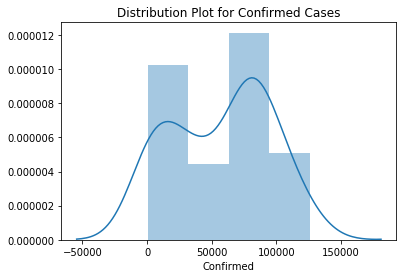

In [8]:
#Distribution plot of confirmed cases around the world 
sns.distplot(datewise["Confirmed"])
plt.title("Distribution Plot for Confirmed Cases")


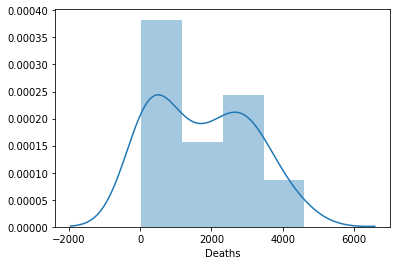

In [9]:
sns.distplot(datewise["Deaths"])

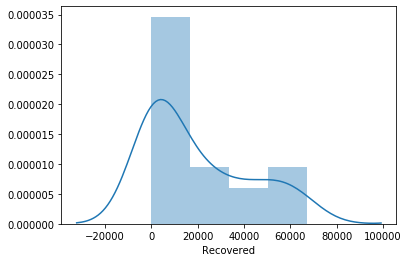

In [10]:
sns.distplot(datewise["Recovered"])

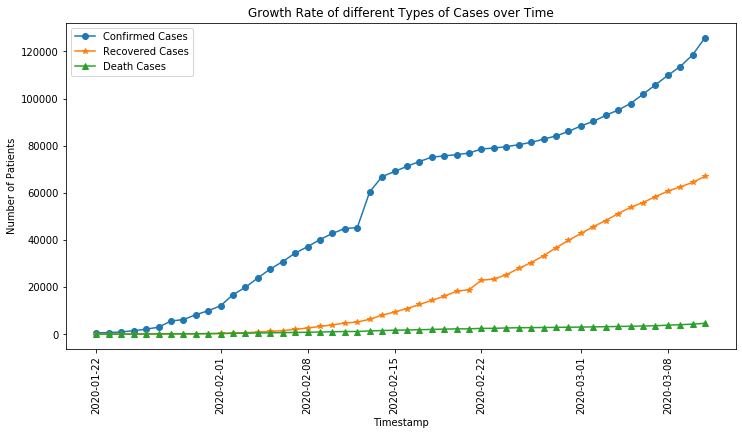

In [11]:
plt.figure(figsize=(12,6))
plt.plot(datewise["Confirmed"],marker="o",label="Confirmed Cases")
plt.plot(datewise["Recovered"],marker="*",label="Recovered Cases")
plt.plot(datewise["Deaths"],marker="^",label="Death Cases")
plt.ylabel("Number of Patients")
plt.xlabel("Timestamp")
plt.xticks(rotation=90)
plt.title("Growth Rate of different Types of Cases over Time")
plt.legend()


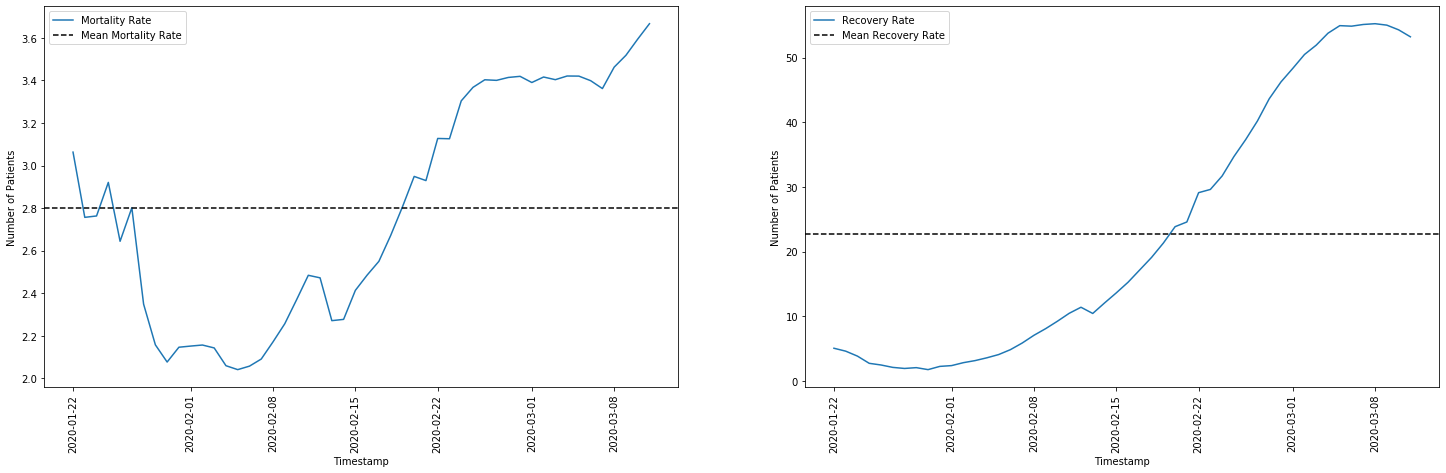

In [12]:
#Calculating the Mortality Rate and Recovery Rate
datewise["Mortality Rate"]=(datewise["Deaths"]/datewise["Confirmed"])*100
datewise["Recovery Rate"]=(datewise["Recovered"]/datewise["Confirmed"])*100

#Plotting Mortality and Recovery Rate 
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(25,7))
ax1.plot(datewise["Mortality Rate"],label='Mortality Rate')
ax1.axhline(datewise["Mortality Rate"].mean(),linestyle='--',color='black',label="Mean Mortality Rate")
ax1.set_ylabel("Number of Patients")
ax1.set_xlabel("Timestamp")
ax1.legend()
for tick in ax1.get_xticklabels():
    tick.set_rotation(90)
ax2.plot(datewise["Recovery Rate"],label="Recovery Rate")
ax2.axhline(datewise["Recovery Rate"].mean(),linestyle='--',color='black',label="Mean Recovery Rate")
ax2.set_ylabel("Number of Patients")
ax2.set_xlabel("Timestamp")
ax2.legend()
for tick in ax2.get_xticklabels():
    tick.set_rotation(90)

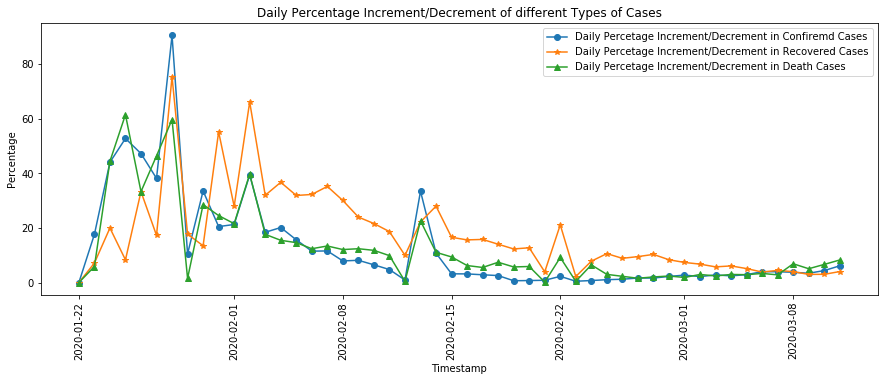

In [13]:
percent_increase_confirm=[]
percent_increase_recovered=[]
percent_increase_deaths=[]
for i in range(datewise.shape[0]-1):
    percent_increase_confirm.append(((datewise["Confirmed"].iloc[i+1]-datewise["Confirmed"].iloc[i])/datewise["Confirmed"].iloc[i])*100)
    percent_increase_recovered.append(((datewise["Recovered"].iloc[i+1]-datewise["Recovered"].iloc[i])/datewise["Recovered"].iloc[i])*100)
    percent_increase_deaths.append(((datewise["Deaths"].iloc[i+1]-datewise["Deaths"].iloc[i])/datewise["Deaths"].iloc[i])*100)
percent_increase_confirm.insert(0,0)
percent_increase_recovered.insert(0,0)
percent_increase_deaths.insert(0,0)

plt.figure(figsize=(15,5))
plt.plot(datewise.index,percent_increase_confirm,label="Daily Percetage Increment/Decrement in Confiremd Cases",marker='o')
plt.plot(datewise.index,percent_increase_recovered,label="Daily Percetage Increment/Decrement in Recovered Cases",marker='*')
plt.plot(datewise.index,percent_increase_deaths,label="Daily Percetage Increment/Decrement in Death Cases",marker='^')
plt.xlabel("Timestamp")
plt.ylabel("Percentage")
plt.title("Daily Percentage Increment/Decrement of different Types of Cases")
plt.xticks(rotation=90)
plt.legend()

In [14]:
#Calculating countrywise Moratality and Recovery Rate
countrywise=covid[covid["ObservationDate"]==covid["ObservationDate"].max()].groupby(["Country/Region"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'}).sort_values(["Confirmed"],ascending=False)
countrywise["Mortality"]=(countrywise["Deaths"]/countrywise["Confirmed"])*100
countrywise["Recovery"]=(countrywise["Recovered"]/countrywise["Confirmed"])*100

Text(0.5, 0, 'Recovery (in Percentage)')

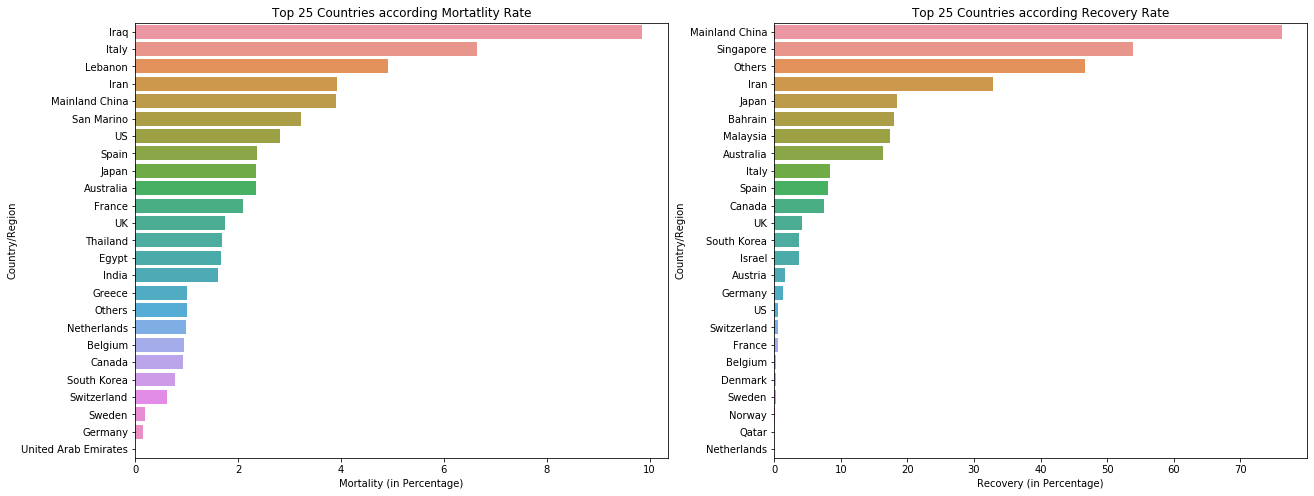

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(21,8))
countrywise_plot_mortal=countrywise[countrywise["Confirmed"]>50].sort_values(["Mortality"],ascending=False).head(25)
sns.barplot(x=countrywise_plot_mortal["Mortality"],y=countrywise_plot_mortal.index,ax=ax1)
ax1.set_title("Top 25 Countries according Mortatlity Rate")
ax1.set_xlabel("Mortality (in Percentage)")
countrywise_plot_recover=countrywise[countrywise["Confirmed"]>100].sort_values(["Recovery"],ascending=False).head(25)
sns.barplot(x=countrywise_plot_recover["Recovery"],y=countrywise_plot_recover.index, ax=ax2)
ax2.set_title("Top 25 Countries according Recovery Rate")
ax2.set_xlabel("Recovery (in Percentage)")


In [16]:
no_recovered_countries=countrywise[(countrywise["Confirmed"]>30)&(countrywise["Recovered"]==0)][["Confirmed","Deaths"]]
no_recovered_countries["Mortality Rate"]=(no_recovered_countries["Deaths"]/no_recovered_countries["Confirmed"])*100
no_recovered_countries[no_recovered_countries["Mortality Rate"]>0].sort_values(["Confirmed"],ascending=False)

,Confirmed,Deaths,Mortality Rate
Country/Region,,,
Netherlands,503,5,0.994036
Greece,99,1,1.010101
San Marino,62,2,3.225806
Ireland,43,1,2.325581


In [17]:
china_data=covid[covid["Country/Region"]=="Mainland China"]
Italy_data=covid[covid["Country/Region"]=="Italy"]
Iran_data=covid[covid["Country/Region"]=="Iran"]
rest_of_world=covid[(covid["Country/Region"]!="Mainland China")&(covid["Country/Region"]!="Iran")&(covid["Country/Region"]!="Italy")]
datewise_china=china_data.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
datewise_Italy=Italy_data.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
datewise_Iran=Iran_data.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
datewise_restofworld=rest_of_world.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})

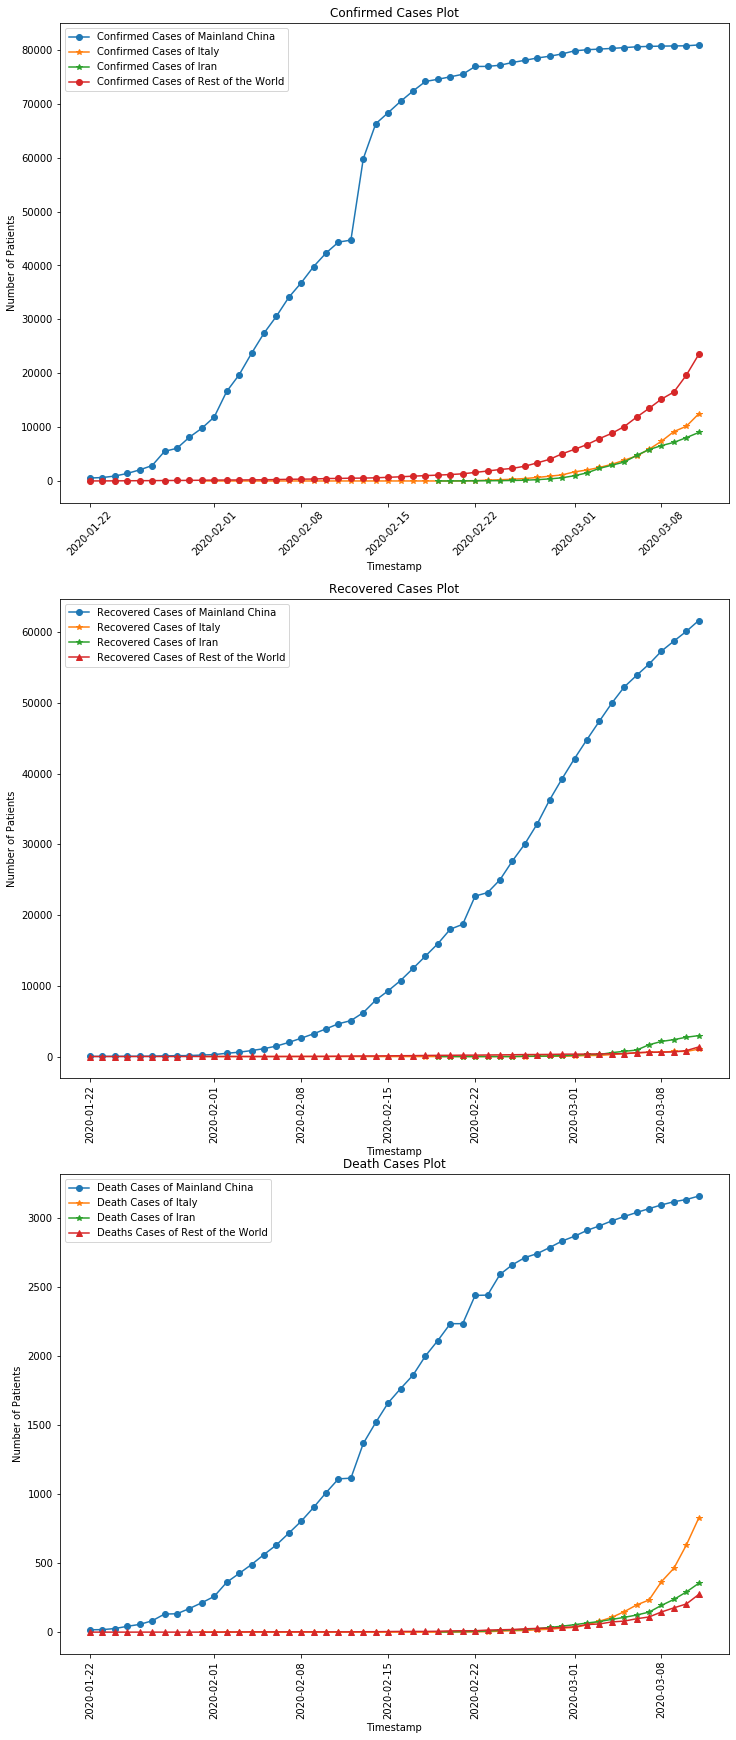

In [18]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1,figsize=(12,30))
ax1.plot(datewise_china["Confirmed"],label="Confirmed Cases of Mainland China",marker='o')
ax1.plot(datewise_Italy["Confirmed"],label="Confirmed Cases of Italy",marker='*')
ax1.plot(datewise_Iran["Confirmed"],label="Confirmed Cases of Iran",marker='*')
ax1.plot(datewise_restofworld["Confirmed"],label="Confirmed Cases of Rest of the World",marker='o')
ax1.set_title("Confirmed Cases Plot")
ax1.set_ylabel("Number of Patients")
ax1.set_xlabel("Timestamp")
ax1.legend()
for tick in ax1.get_xticklabels():
    tick.set_rotation(45)
ax2.plot(datewise_china["Recovered"],label="Recovered Cases of Mainland China",marker='o')
ax2.plot(datewise_Italy["Recovered"],label="Recovered Cases of Italy",marker='*')
ax2.plot(datewise_Iran["Recovered"],label="Recovered Cases of Iran",marker='*')
ax2.plot(datewise_restofworld["Recovered"],label="Recovered Cases of Rest of the World",marker='^')
ax2.set_title("Recovered Cases Plot")
ax2.set_ylabel("Number of Patients")
ax2.set_xlabel("Timestamp")
ax2.legend()
for tick in ax2.get_xticklabels():
    tick.set_rotation(90)
ax3.plot(datewise_china["Deaths"],label='Death Cases of Mainland China',marker='o')
ax3.plot(datewise_Italy["Deaths"],label='Death Cases of Italy',marker='*')
ax3.plot(datewise_Iran["Deaths"],label='Death Cases of Iran',marker='*')
ax3.plot(datewise_restofworld["Deaths"],label="Deaths Cases of Rest of the World",marker='^')
ax3.set_title("Death Cases Plot")
ax3.set_ylabel("Number of Patients")
ax3.set_xlabel("Timestamp")
ax3.legend()
for tick in ax3.get_xticklabels():
    tick.set_rotation(90)

In [19]:
datewise_china["Mortality"]=(datewise_china["Deaths"]/datewise_china["Confirmed"])*100
datewise_Italy["Mortality"]=(datewise_Italy["Deaths"]/datewise_Italy["Confirmed"])*100
datewise_Iran["Mortality"]=(datewise_Iran["Deaths"]/datewise_Iran["Confirmed"])*100

datewise_restofworld["Mortality"]=(datewise_restofworld["Deaths"]/datewise_restofworld["Confirmed"])*100
datewise_china["Recovery"]=(datewise_china["Recovered"]/datewise_china["Confirmed"])*100
datewise_Italy["Recovery"]=(datewise_Italy["Recovered"]/datewise_Italy["Confirmed"])*100
datewise_Iran["Recovery"]=(datewise_Iran["Recovered"]/datewise_Iran["Confirmed"])*100
datewise_restofworld["Recovery"]=(datewise_restofworld["Recovered"]/datewise_restofworld["Confirmed"])*100

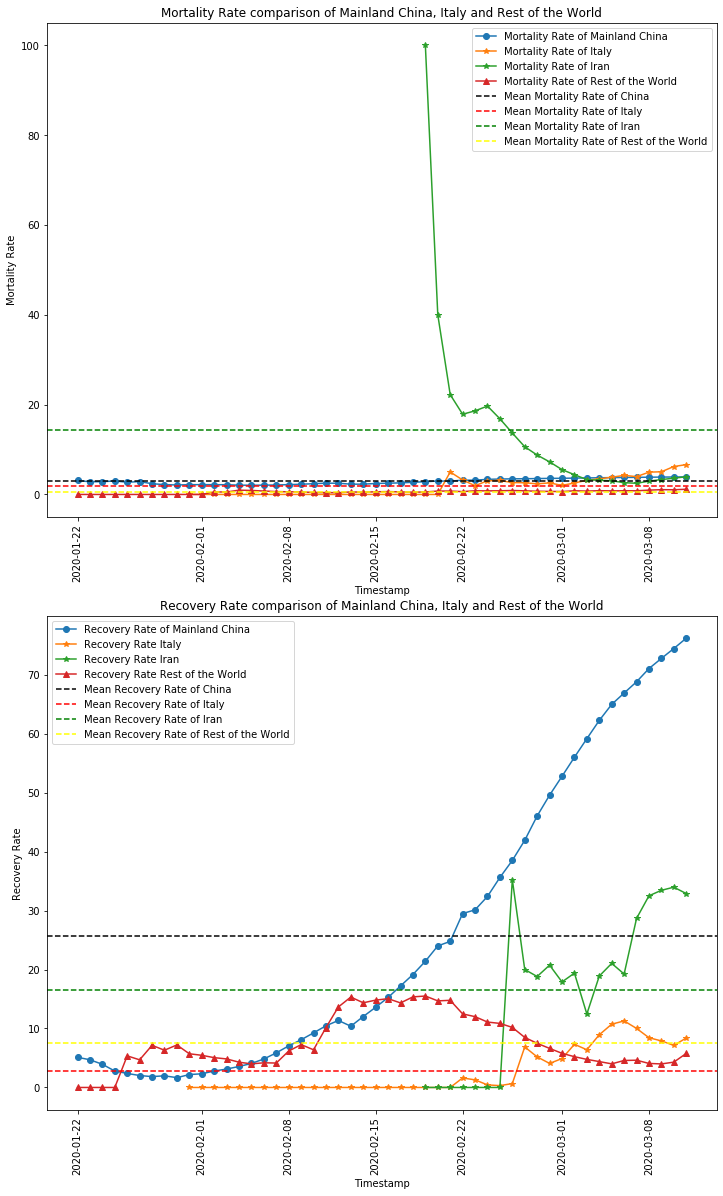

In [20]:
fig, (ax1,ax2) = plt.subplots(2, 1,figsize=(12,20))
ax1.plot(datewise_china["Mortality"],label="Mortality Rate of Mainland China",marker='o')
ax1.plot(datewise_Italy["Mortality"],label="Mortality Rate of Italy",marker='*')
ax1.plot(datewise_Iran["Mortality"],label="Mortality Rate of Iran",marker='*')
ax1.plot(datewise_restofworld["Mortality"],label="Mortality Rate of Rest of the World",marker='^')
ax1.axhline(datewise_china["Mortality"].mean(),linestyle='--',color='black',label="Mean Mortality Rate of China")
ax1.axhline(datewise_Italy["Mortality"].mean(),linestyle='--',color='red',label="Mean Mortality Rate of Italy")
ax1.axhline(datewise_Iran["Mortality"].mean(),linestyle='--',color='green',label="Mean Mortality Rate of Iran")

ax1.axhline(datewise_restofworld["Mortality"].mean(),linestyle='--',color='yellow',label="Mean Mortality Rate of Rest of the World")
ax1.set_ylabel("Mortality Rate")
ax1.set_xlabel("Timestamp")
ax1.set_title("Mortality Rate comparison of Mainland China, Italy and Rest of the World")
ax1.legend()
for tick in ax1.get_xticklabels():
    tick.set_rotation(90)
ax2.plot(datewise_china["Recovery"],label="Recovery Rate of Mainland China",marker='o')
ax2.plot(datewise_Italy["Recovery"],label="Recovery Rate Italy",marker='*')
ax2.plot(datewise_Iran["Recovery"],label="Recovery Rate Iran",marker='*')

ax2.plot(datewise_restofworld["Recovery"],label="Recovery Rate Rest of the World",marker='^')
ax2.axhline(datewise_china["Recovery"].mean(),linestyle='--',color='black',label="Mean Recovery Rate of China")
ax2.axhline(datewise_Italy["Recovery"].mean(),linestyle='--',color='red',label="Mean Recovery Rate of Italy")
ax2.axhline(datewise_Iran["Recovery"].mean(),linestyle='--',color='green',label="Mean Recovery Rate of Iran")

ax2.axhline(datewise_restofworld["Recovery"].mean(),linestyle='--',color='yellow',label="Mean Recovery Rate of Rest of the World")
ax2.set_ylabel("Recovery Rate")
ax2.set_xlabel("Timestamp")
ax2.set_title("Recovery Rate comparison of Mainland China, Italy and Rest of the World")
ax2.legend()
for tick in ax2.get_xticklabels():
    tick.set_rotation(90)

In [21]:
len(datewise),len(datewise_restofworld),len(datewise_china)

(50, 50, 50)

# Linear Regression Model for Deaths Cases Prediction¶


In [22]:
datewise["Days Since"]=datewise.index-datewise.index[0]
datewise["Days Since"]=datewise["Days Since"].dt.days
train_ml=datewise.ix['2020-01-22':'2020-03-07']
valid_ml=datewise.ix['2020-03-08':'2020-03-15']

In [23]:
lin_reg=LinearRegression(normalize=True)
lin_reg.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Deaths"]).reshape(-1,1))
prediction_valid_linreg=lin_reg.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("Root Mean Square Value:",np.sqrt(mean_squared_error(valid_ml["Deaths"],prediction_valid_linreg)))
print("Mae  Mean Absloud Error: ",np.sqrt(mean_absolute_error(valid_ml["Deaths"],prediction_valid_linreg)))

Root Mean Square Value: 474.21249903715386
Mae  Mean Absloud Error:  20.651827901738148


# RidgeCV

In [24]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error
model_ridge = RidgeCV(cv=10)
model_ridge.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Deaths"]).reshape(-1,1))
prediction_valid_linreg=model_ridge.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("Root Mean Square Value:",np.sqrt(mean_squared_error(valid_ml["Deaths"],prediction_valid_linreg)))
print("Mae  Mean Absloud Error: ",np.sqrt(mean_absolute_error(valid_ml["Deaths"],prediction_valid_linreg)))

Root Mean Square Value: 476.710767210561
Mae  Mean Absloud Error:  20.71753879719838


/home/rad/anaconda3/envs/tensorflow/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


# DecisionTreeRegressor

In [25]:
from sklearn.tree import DecisionTreeRegressor
model_dt = DecisionTreeRegressor(min_samples_leaf=7,
                               max_depth=8)
model_dt.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Deaths"]).reshape(-1,1))
prediction_valid_linreg=model_dt.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("Root Mean Square Value:",np.sqrt(mean_squared_error(valid_ml["Deaths"],prediction_valid_linreg)))
print("Mae  Mean Absloud Error: ",np.sqrt(mean_absolute_error(valid_ml["Deaths"],prediction_valid_linreg)))



Root Mean Square Value: 1163.8341208895472
Mae  Mean Absloud Error:  33.514635149897856


# KNeighborsRegressor

In [26]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.multioutput import MultiOutputRegressor
knn = KNeighborsRegressor()
knn.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Deaths"]).reshape(-1,1))
prediction_valid_linreg=knn.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("Root Mean Square Value:",np.sqrt(mean_squared_error(valid_ml["Deaths"],prediction_valid_linreg)))
print("Mae  Mean Absloud Error: ",np.sqrt(mean_absolute_error(valid_ml["Deaths"],prediction_valid_linreg)))



Root Mean Square Value: 868.2347032916848
Mae  Mean Absloud Error:  28.513154858766505


# SVR

In [27]:
from sklearn.svm import SVR
svr= SVR(kernel='rbf',gamma=10,C=1.0, epsilon=0.05)
svr.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Deaths"]).reshape(-1,1))
prediction_valid_linreg=svr.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("Root Mean Square Value:",np.sqrt(mean_squared_error(valid_ml["Deaths"],prediction_valid_linreg)))
print("Mae  Mean Absloud Error: ",np.sqrt(mean_absolute_error(valid_ml["Deaths"],prediction_valid_linreg)))


Root Mean Square Value: 2739.0046452167408
Mae  Mean Absloud Error:  52.17278973420932


`China prediciton`


In [28]:
datewise_china["Days Since"]=datewise_china.index-datewise_china.index[0]
datewise_china["Days Since"]=datewise_china["Days Since"].dt.days
train_ml=datewise_china.ix['2020-01-22':'2020-03-07']
valid_ml=datewise_china.ix['2020-03-08':'2020-03-15']

# LinearRegression

In [29]:
lin_reg=LinearRegression(normalize=True)
lin_reg.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Deaths"]).reshape(-1,1))
prediction_valid_linreg=lin_reg.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("Root Mean Square Value:",np.sqrt(mean_squared_error(valid_ml["Deaths"],prediction_valid_linreg)))
print("Mae  Mean Absloud Error: ",np.sqrt(mean_absolute_error(valid_ml["Deaths"],prediction_valid_linreg)))

Root Mean Square Value: 418.86064394327354
Mae  Mean Absloud Error:  20.32601613335043


# RidgeCV

In [30]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error
model_ridge = RidgeCV(cv=10)
model_ridge.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Deaths"]).reshape(-1,1))
prediction_valid_linreg=model_ridge.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("Root Mean Square Value:",np.sqrt(mean_squared_error(valid_ml["Deaths"],prediction_valid_linreg)))
print("Mae  Mean Absloud Error: ",np.sqrt(mean_absolute_error(valid_ml["Deaths"],prediction_valid_linreg)))

Root Mean Square Value: 416.3375411883986
Mae  Mean Absloud Error:  20.2634588613901


/home/rad/anaconda3/envs/tensorflow/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


# DecisionTreeRegressor

In [31]:
from sklearn.tree import DecisionTreeRegressor
model_dt = DecisionTreeRegressor(min_samples_leaf=7,
                               max_depth=8)
model_dt.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Deaths"]).reshape(-1,1))
prediction_valid_linreg=model_dt.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("Root Mean Square Value:",np.sqrt(mean_squared_error(valid_ml["Deaths"],prediction_valid_linreg)))
print("Mae  Mean Absloud Error: ",np.sqrt(mean_absolute_error(valid_ml["Deaths"],prediction_valid_linreg)))

Root Mean Square Value: 171.59326909876157
Mae  Mean Absloud Error:  13.038404810405298


# KNeighborsRegressor

In [32]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.multioutput import MultiOutputRegressor
knn = KNeighborsRegressor()
knn.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Deaths"]).reshape(-1,1))
prediction_valid_linreg=knn.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("Root Mean Square Value:",np.sqrt(mean_squared_error(valid_ml["Deaths"],prediction_valid_linreg)))
print("Mae  Mean Absloud Error: ",np.sqrt(mean_absolute_error(valid_ml["Deaths"],prediction_valid_linreg)))

Root Mean Square Value: 120.5783562667863
Mae  Mean Absloud Error:  10.87658034494299


# SVR

In [33]:
from sklearn.svm import SVR
svr= SVR(kernel='rbf',gamma=10,C=1.0, epsilon=0.05)
svr.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Deaths"]).reshape(-1,1))
prediction_valid_linreg=svr.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("Root Mean Square Value:",np.sqrt(mean_squared_error(valid_ml["Deaths"],prediction_valid_linreg)))
print("Mae  Mean Absloud Error: ",np.sqrt(mean_absolute_error(valid_ml["Deaths"],prediction_valid_linreg)))


Root Mean Square Value: 1684.6615275707338
Mae  Mean Absloud Error:  41.042660594191716


`Italy`

In [168]:
datewise_Italy["Days Since"]=datewise_Italy.index-datewise_Italy.index[0]
datewise_Italy["Days Since"]=datewise_Italy["Days Since"].dt.days
train_ml=datewise_Italy.ix['2020-01-22':'2020-03-07']
valid_ml=datewise_Italy.ix['2020-03-08':'2020-03-15']

# LinearRegression

In [34]:
lin_reg=LinearRegression(normalize=True)
lin_reg.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Deaths"]).reshape(-1,1))
prediction_valid_linreg=lin_reg.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("Root Mean Square Value:",np.sqrt(mean_squared_error(valid_ml["Deaths"],prediction_valid_linreg)))
print("Mae  Mean Absloud Error: ",np.sqrt(mean_absolute_error(valid_ml["Deaths"],prediction_valid_linreg)))

Root Mean Square Value: 418.86064394327354
Mae  Mean Absloud Error:  20.32601613335043


# RidgeCV

In [35]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error
model_ridge = RidgeCV(cv=10) 
model_ridge.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Deaths"]).reshape(-1,1))
prediction_valid_linreg=model_ridge.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("Root Mean Square Value:",np.sqrt(mean_squared_error(valid_ml["Deaths"],prediction_valid_linreg)))
print("Mae  Mean Absloud Error: ",np.sqrt(mean_absolute_error(valid_ml["Deaths"],prediction_valid_linreg)))

Root Mean Square Value: 416.3375411883986
Mae  Mean Absloud Error:  20.2634588613901


/home/rad/anaconda3/envs/tensorflow/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


# DecisionTreeRegressor

In [36]:
from sklearn.tree import DecisionTreeRegressor
model_dt = DecisionTreeRegressor(min_samples_leaf=7,
                               max_depth=8)
model_dt.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Deaths"]).reshape(-1,1))
prediction_valid_linreg=model_dt.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("Root Mean Square Value:",np.sqrt(mean_squared_error(valid_ml["Deaths"],prediction_valid_linreg)))
print("Mae  Mean Absloud Error: ",np.sqrt(mean_absolute_error(valid_ml["Deaths"],prediction_valid_linreg)))

Root Mean Square Value: 171.59326909876157
Mae  Mean Absloud Error:  13.038404810405298


# KNeighborsRegressor

In [37]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.multioutput import MultiOutputRegressor
knn = KNeighborsRegressor()
knn.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Deaths"]).reshape(-1,1))
prediction_valid_linreg=knn.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("Root Mean Square Value:",np.sqrt(mean_squared_error(valid_ml["Deaths"],prediction_valid_linreg)))
print("Mae  Mean Absloud Error: ",np.sqrt(mean_absolute_error(valid_ml["Deaths"],prediction_valid_linreg)))

Root Mean Square Value: 120.5783562667863
Mae  Mean Absloud Error:  10.87658034494299


# SVR

In [38]:
from sklearn.svm import SVR
svr= SVR(kernel='rbf',gamma=10,C=1.0, epsilon=0.05)
svr.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Deaths"]).reshape(-1,1))
prediction_valid_linreg=svr.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("Root Mean Square Value:",np.sqrt(mean_squared_error(valid_ml["Deaths"],prediction_valid_linreg)))
print("Mae  Mean Absloud Error: ",np.sqrt(mean_absolute_error(valid_ml["Deaths"],prediction_valid_linreg)))


Root Mean Square Value: 1684.6615275707338
Mae  Mean Absloud Error:  41.042660594191716


`Iran`

In [174]:
datewise_Iran["Days Since"]=datewise_Iran.index-datewise_Iran.index[0]
datewise_Iran["Days Since"]=datewise_Iran["Days Since"].dt.days
train_ml=datewise_Iran.ix['2020-01-22':'2020-03-07']
valid_ml=datewise_Iran.ix['2020-03-08':'2020-03-15']

# LinearRegression

In [39]:
lin_reg=LinearRegression(normalize=True)
lin_reg.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Deaths"]).reshape(-1,1))
prediction_valid_linreg=lin_reg.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("Root Mean Square Value:",np.sqrt(mean_squared_error(valid_ml["Deaths"],prediction_valid_linreg)))
print("Mae  Mean Absloud Error: ",np.sqrt(mean_absolute_error(valid_ml["Deaths"],prediction_valid_linreg)))

Root Mean Square Value: 418.86064394327354
Mae  Mean Absloud Error:  20.32601613335043


# RidgeCV

In [40]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error
model_ridge = RidgeCV(cv=10) 
model_ridge.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Deaths"]).reshape(-1,1))
prediction_valid_linreg=model_ridge.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("Root Mean Square Value:",np.sqrt(mean_squared_error(valid_ml["Deaths"],prediction_valid_linreg)))
print("Mae  Mean Absloud Error: ",np.sqrt(mean_absolute_error(valid_ml["Deaths"],prediction_valid_linreg)))

Root Mean Square Value: 416.3375411883986
Mae  Mean Absloud Error:  20.2634588613901


/home/rad/anaconda3/envs/tensorflow/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


# DecisionTreeRegressor

In [41]:
from sklearn.tree import DecisionTreeRegressor
model_dt = DecisionTreeRegressor(min_samples_leaf=7,
                               max_depth=8)
model_dt.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Deaths"]).reshape(-1,1))
prediction_valid_linreg=model_dt.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("Root Mean Square Value:",np.sqrt(mean_squared_error(valid_ml["Deaths"],prediction_valid_linreg)))
print("Mae  Mean Absloud Error: ",np.sqrt(mean_absolute_error(valid_ml["Deaths"],prediction_valid_linreg)))

Root Mean Square Value: 171.59326909876157
Mae  Mean Absloud Error:  13.038404810405298


# KNeighborsRegressor

In [42]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.multioutput import MultiOutputRegressor
knn = KNeighborsRegressor()
knn.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Deaths"]).reshape(-1,1))
prediction_valid_linreg=knn.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("Root Mean Square Value:",np.sqrt(mean_squared_error(valid_ml["Deaths"],prediction_valid_linreg)))
print("Mae  Mean Absloud Error: ",np.sqrt(mean_absolute_error(valid_ml["Deaths"],prediction_valid_linreg)))

Root Mean Square Value: 120.5783562667863
Mae  Mean Absloud Error:  10.87658034494299


# SVR

In [43]:
from sklearn.svm import SVR
svr= SVR(kernel='rbf',gamma=10,C=1.0, epsilon=0.05)
svr.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Deaths"]).reshape(-1,1))
prediction_valid_linreg=svr.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("Root Mean Square Value:",np.sqrt(mean_squared_error(valid_ml["Deaths"],prediction_valid_linreg)))
print("Mae  Mean Absloud Error: ",np.sqrt(mean_absolute_error(valid_ml["Deaths"],prediction_valid_linreg)))


Root Mean Square Value: 1684.6615275707338
Mae  Mean Absloud Error:  41.042660594191716
